# Building a Loan Decision Engine

### [Open Libraries](#Libraries)
### [Open Read Data](#ReadData)
### [Open Explore data](#Exploredata)
### [Open Visualization and Analysis](#Visualization)
### [Open Data Preprocessing](#Preprocessing)
### [Open Modeling and Evaluation](#Modeling)


<a id ="Libraries"></a>
## Libraries

In [533]:
import numpy as np
import pandas as pd
import seaborn as sns
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, f1_score

<a id ="ReadData"></a>
## Read Data

In [77]:
df = pd.read_csv("Loan_default.csv")
df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


<a id ="Exploredata"></a>
## Explore data

In [78]:
# Data information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [79]:
# Nulls in data 
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [80]:
# Duplicates in data 
df.duplicated().sum()

0

In [81]:
# Data description
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


### Conclusion after explore data
####    1- Target Variable: Default (0: No default, 1: Default).
####    2- Key Predictors: Features like Age, Income, LoanAmount, CreditScore, and DTIRatio seem important for predicting loan default.
####    3- Categorical Variables: Include Education, EmploymentType, MaritalStatus, etc., requiring encoding for use in models.
####    4- No Missing Values: All columns are complete, simplifying preprocessing.

###

<a id ="Visualization"></a>
## Visualization and Analysis

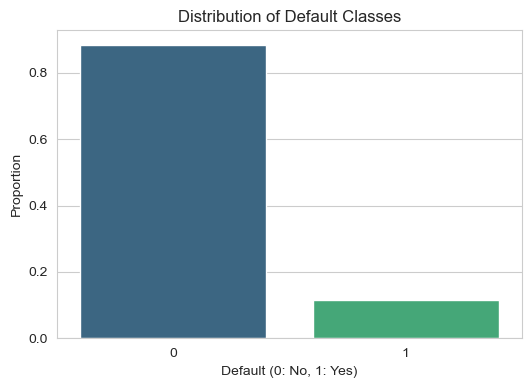

Default
0    225694
1     29653
Name: count, dtype: int64


In [368]:
# Check class distribution for the target variable
default_distribution = df['Default'].value_counts(normalize=True)

# Visualize the class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=default_distribution.index, y=default_distribution.values, palette='viridis')
plt.title("Distribution of Default Classes")
plt.xlabel("Default (0: No, 1: Yes)")
plt.ylabel("Proportion")
plt.show()
class_counts = df["Default"].value_counts()
print(class_counts)

#### From this figure it is clear that the data is unbalanced and this must be taken into account during the modeling step.

###

### Function to draw distribution between numerical columns and label column.

In [83]:
# Function to draw distribution between numerical columns and label column.

def draw_distribution_numerical(numerical_column ,target_column = 'Default'):
    
    # Split the data into two groups based on the target column
    target_0 = df[df[target_column] == 0]
    target_1 = df[df[target_column] == 1]

    # Set up the matplotlib figure
    plt.figure(figsize=(14, 7))

    # Plot histogram for target = 0
    sns.histplot(target_0[numerical_column], kde=True, color='blue', alpha=0.5, label=f'Not {target_column} = 0')

    # Plot histogram for target = 1
    sns.histplot(target_1[numerical_column], kde=True, color='red', alpha=0.5, label=f'{target_column} = 1')

    # Add titles and labels
    plt.title(f'Histogram of {numerical_column} by {target_column}')
    plt.xlabel(numerical_column)
    plt.ylabel('Frequency')

    # Display legend
    plt.legend()
    plt.show()

#
### Distribution between Age and Default

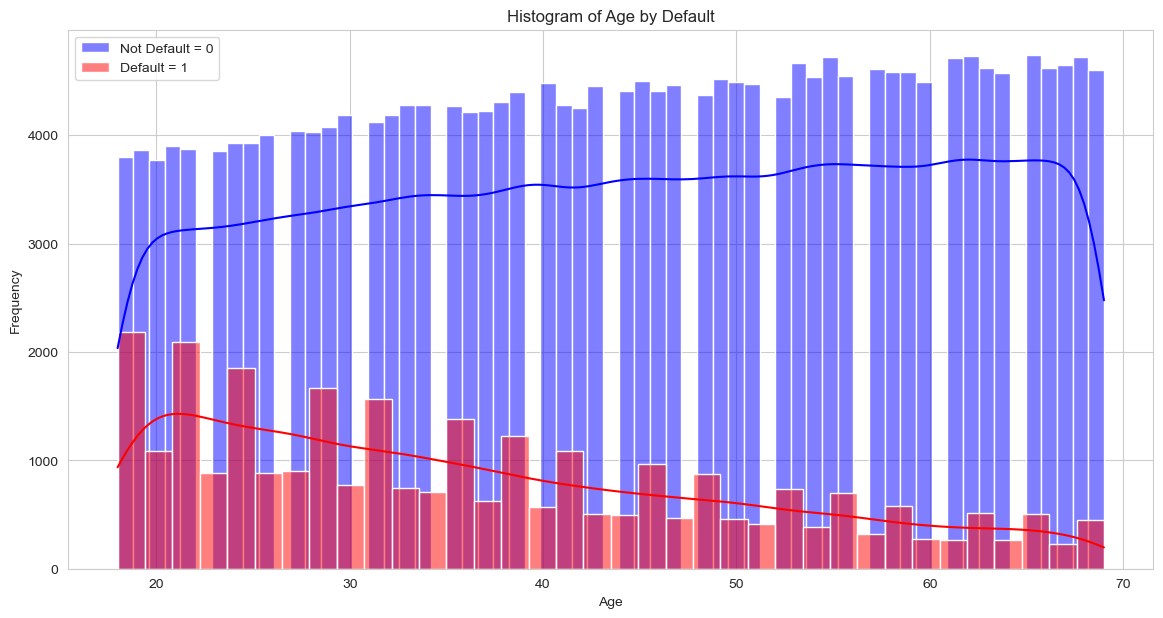

In [84]:
# Distribution between Age and Default
draw_distribution_numerical("Age")



#### From this distribution, it is clear that the younger the age of the loan applicant, the greater the chance of him defaulting on repayment, and this column is considered to have a significant impact on the data.

###

### Distribution between Income and Default

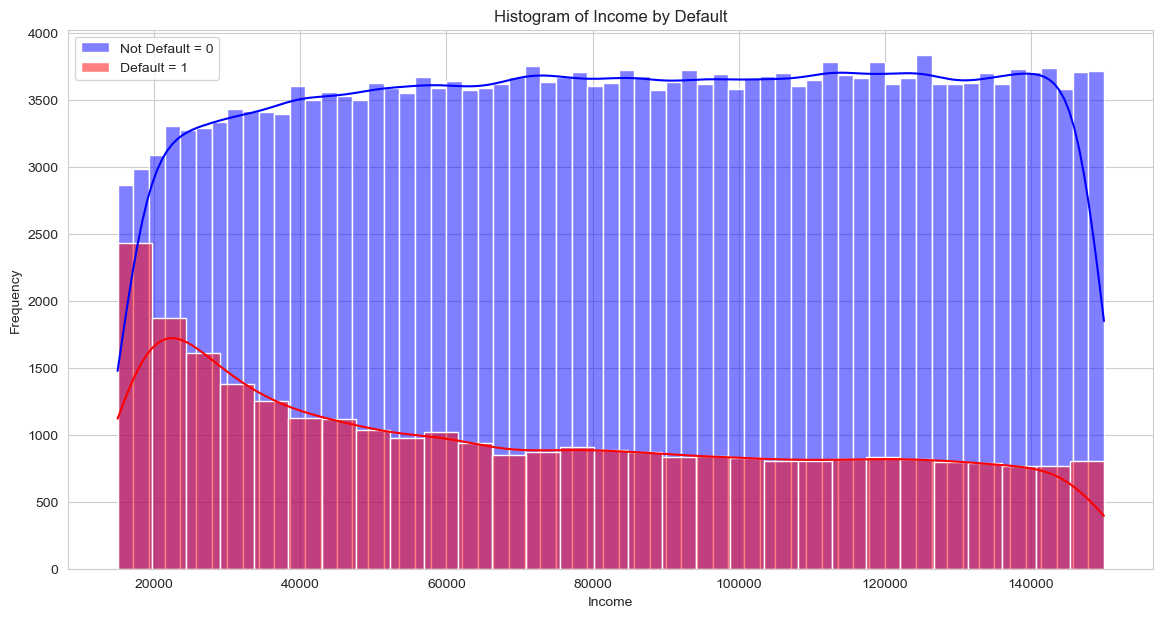

In [85]:
# Distribution between Income and Default
draw_distribution_numerical("Income")

#### From this distribution, it is clear that the lower the borrower’s annual income, the greater the chance of him defaulting on repayment. This column is also considered to have a significant impact on the data.

###

### Distribution between LoanAmount and Default

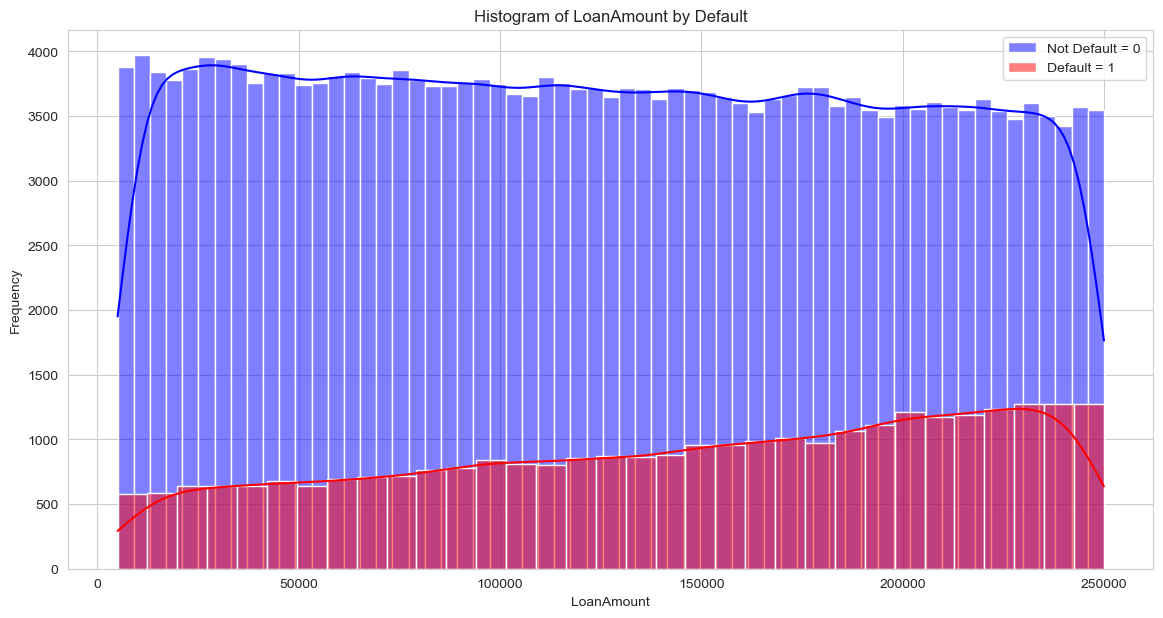

In [86]:
# Distribution between LoanAmount and Default
draw_distribution_numerical("LoanAmount")

#### Through this distribution, it is clear that the greater the amount that is borrowed, the greater the chance of defaulting on repayment. This column is also considered to have a significant impact on the data.

###

### Distribution between CreditScore and Default

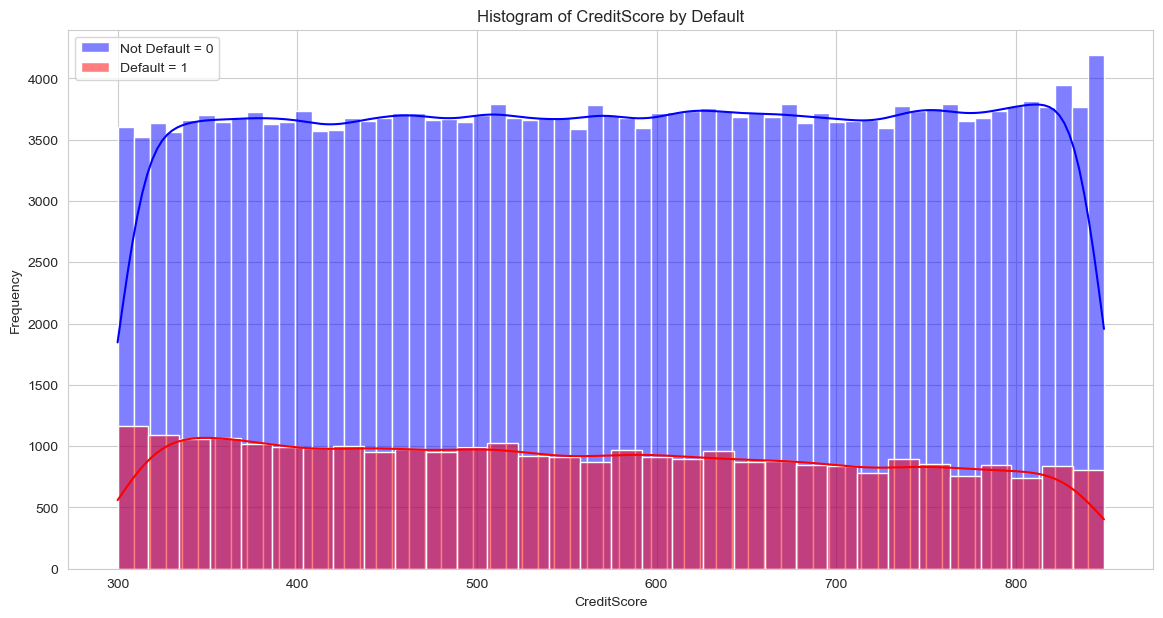

In [87]:
# Distribution between CreditScore and Default
draw_distribution_numerical("CreditScore")

#### From this distribution it is clear that this column has a slight impact on the data, but with another column it is possible to differentiate clearly.

##

### Distribution between MonthsEmployed and Default

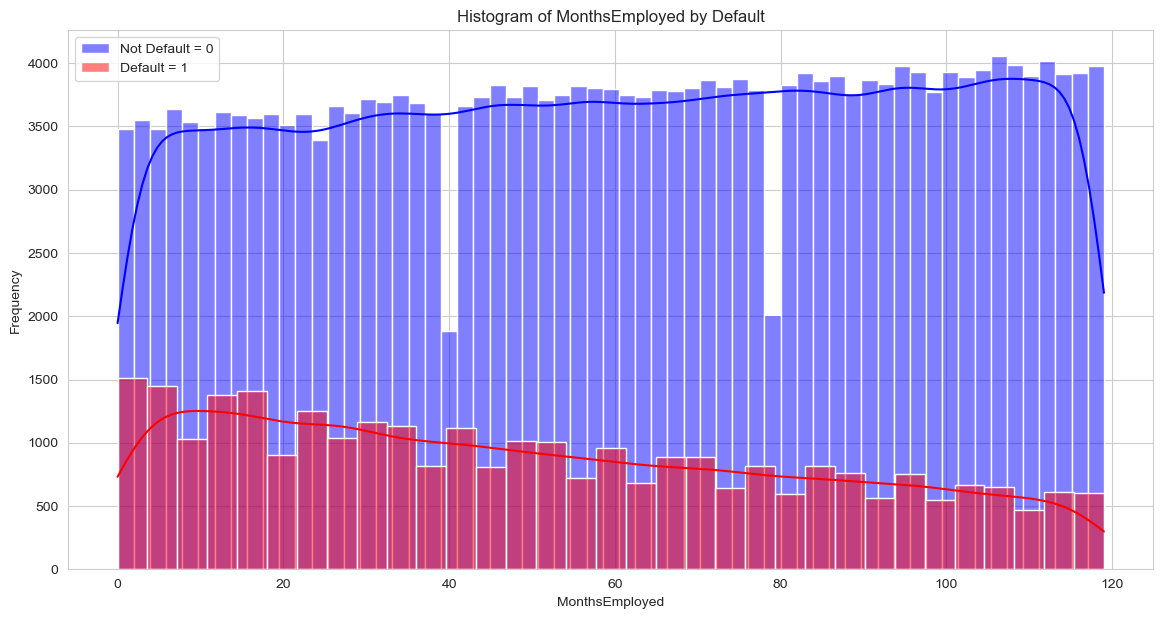

In [88]:
draw_distribution_numerical("MonthsEmployed")

#### From this distribution, it is clear that this column has a significant impact on the data, as people who have been employed for a large number of weeks repay loans better than those who have been working for a small number of weeks.

##

### Distribution between InterestRate and Default

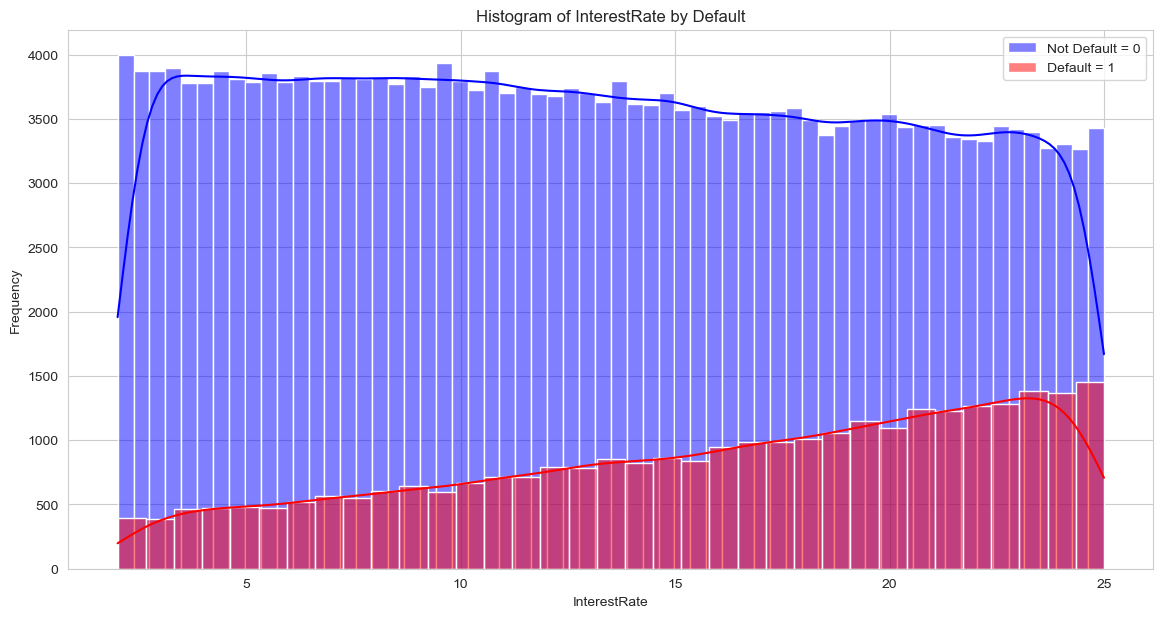

In [89]:
draw_distribution_numerical("InterestRate")

#### From this distribution, it is clear that this column has a significant impact on the data, as the higher the interest rate on the loan, the more people default on repayments.

##

### Distribution between DTIRatio and Default

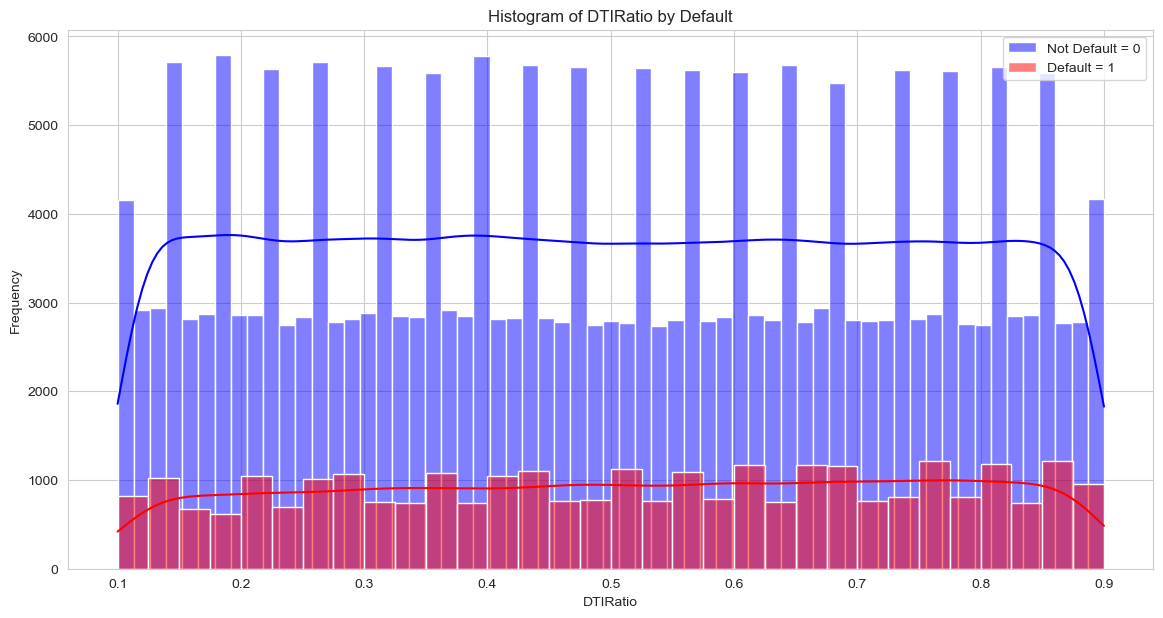

In [98]:
draw_distribution_numerical("DTIRatio")

#### From this distribution, it is clear that this column does not clearly affect the data significantly, but it can have an effect if we include several other columns with it.

##

### Function to draw distribution between catigorical columns and label column

In [570]:
# Function to draw distribution between catigorical columns and label column
def draw_distribution_catigorical(catigorical_column ,target_column = 'Default'):
    # Set the style
    sns.set_style("whitegrid")

    # Create a count plot comparing HasMortgage vs Default
    plt.figure(figsize=(12, 6))
    plot = sns.countplot(x=catigorical_column , hue=target_column, data=df, palette="Set2")

    # Annotate counts above each bar
    for bar in plot.patches:
        count = (int(bar.get_height()) / df.shape[0] ) * 100 # Height of the bar is the count
        formatted_value = round(count, 2)
        if count > 0:  # Only annotate non-zero counts
            x = bar.get_x() + bar.get_width() / 2  # Center the text
            y = bar.get_height()  # Position the text at the top of the bar
            plt.text(x, y + 1, str(formatted_value)+"% from total", ha='center', fontsize=10)

    # Add titles and labels
    plt.title(f'Distribution of Default by {catigorical_column}', fontsize=16)
    plt.xlabel(catigorical_column, fontsize=14)
    plt.ylabel('Count', fontsize=14)

    # Show the plot
    plt.legend(title=target_column, labels=["No Default (0)", "Default (1)"], loc='upper right')
    plt.show()
    class_counts = df[catigorical_column].value_counts()
    print(class_counts)


### The distribution between Education column and Default column

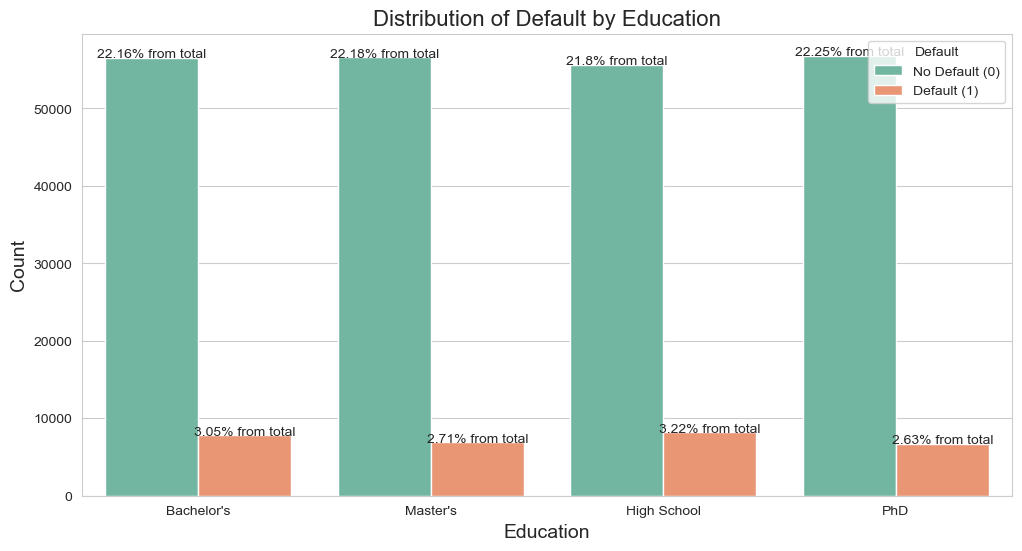

Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64


In [571]:
# distribution between Education columns and Default coulmn
draw_distribution_catigorical("Education")

#### From this distribution, it is clear that this column clearly affects loan repayment, as those who hold high school and bachelor’s degrees default on repayments more than those who hold PhD and Master’s degrees.

##

### The distribution between EmploymentType column and Default column

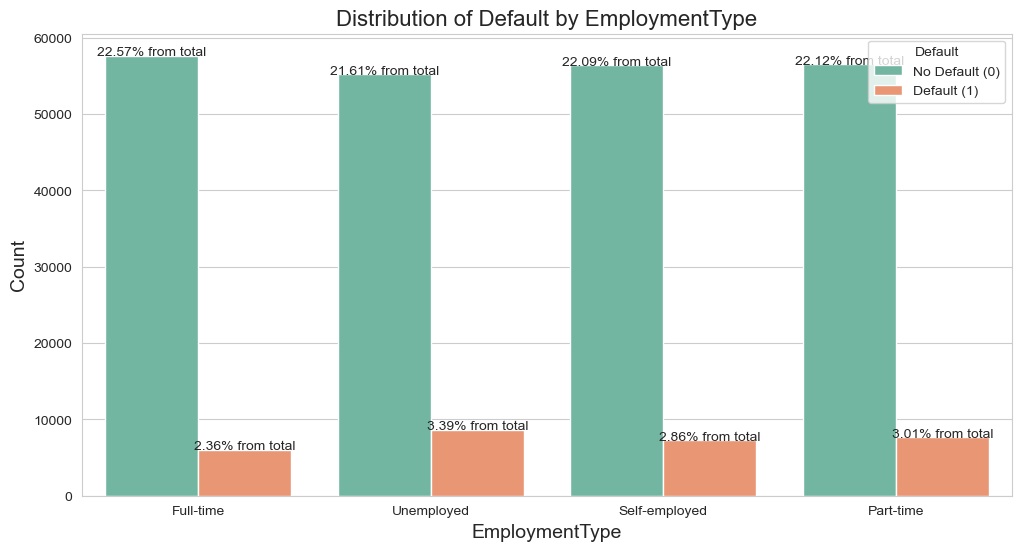

EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64


In [572]:
# distribution between EmploymentType column and Default column
draw_distribution_catigorical("EmploymentType")

#### From this distribution, it is clear that this column clearly affects the repayment of loans, as non-employed people are more likely to not repay debts than employed people.

##

### The distribution between MaritalStatus column and Default coulmn

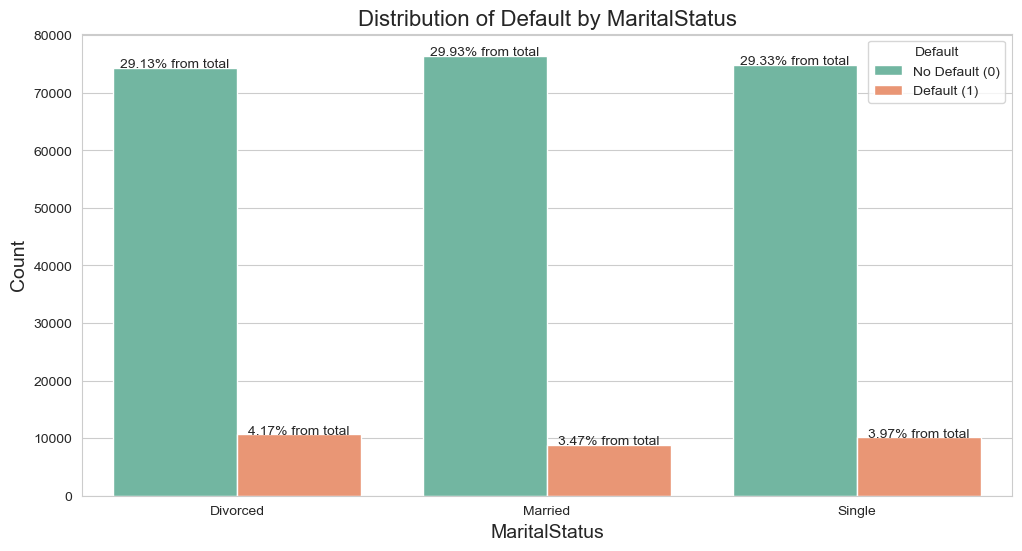

MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64


In [573]:
# distribution between MaritalStatus column and Default coulmn
draw_distribution_catigorical("MaritalStatus")

#### From this distribution, it is clear that this column clearly affects loan repayment, as divorced people often default on loan repayments.

##

### The distribution between HasMortgage column and Default coulmn

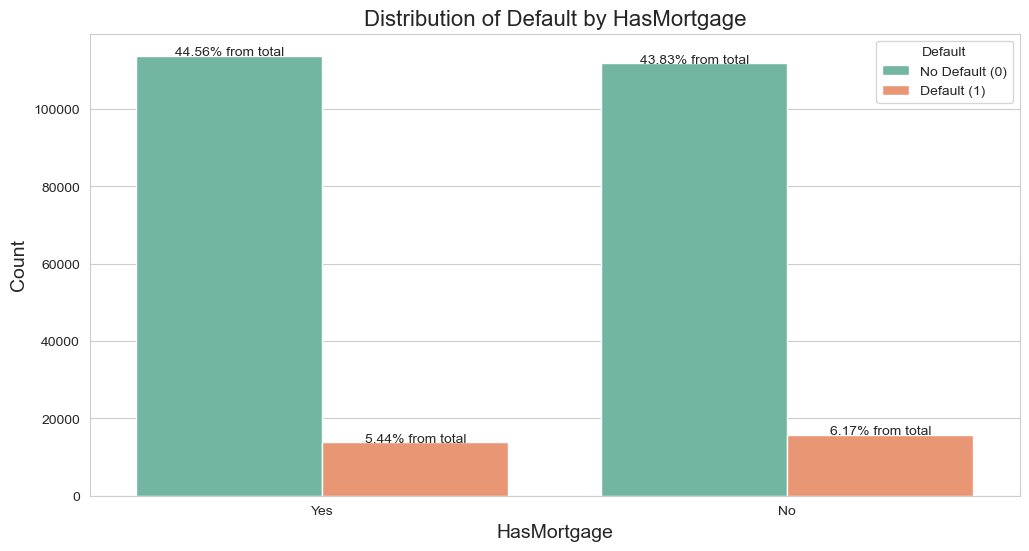

HasMortgage
Yes    127677
No     127670
Name: count, dtype: int64


In [574]:
# distribution between HasMortgage column and Default coulmn
draw_distribution_catigorical("HasMortgage")

#### From this distribution, it is clear that this column clearly affects loan repayment, as the percentage of people who have a mortgage and are in default is less than the rest.

##

### The distribution between HasDependents column and Default coulmn

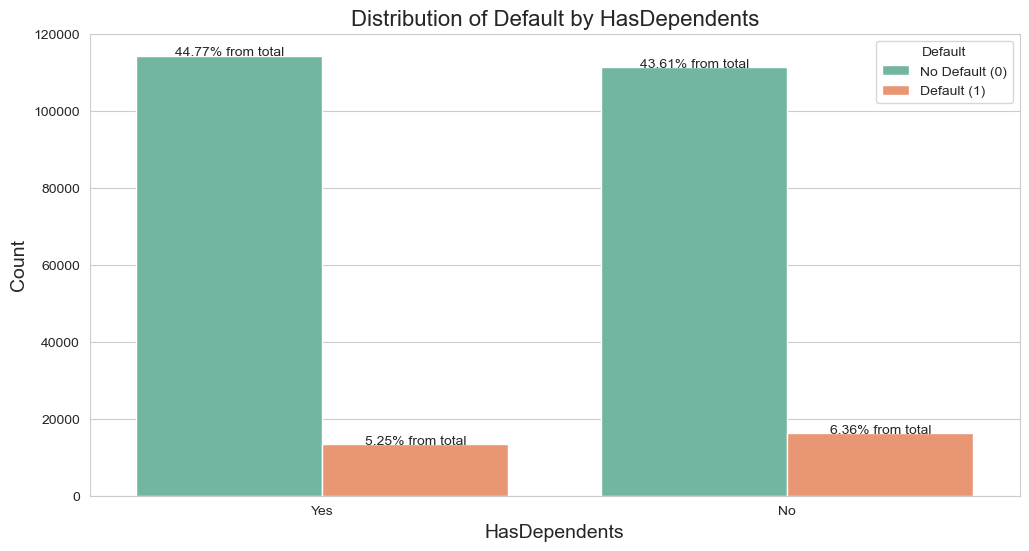

HasDependents
Yes    127742
No     127605
Name: count, dtype: int64


In [575]:
# distribution between HasDependents column and Default coulmn
draw_distribution_catigorical("HasDependents")

#### From this distribution, it is clear that this column clearly affects loan repayment, as the percentage of people who have dependents default is lower than that of those who do not have dependents.

##

### The distribution between LoanPurpose column and Default coulmn

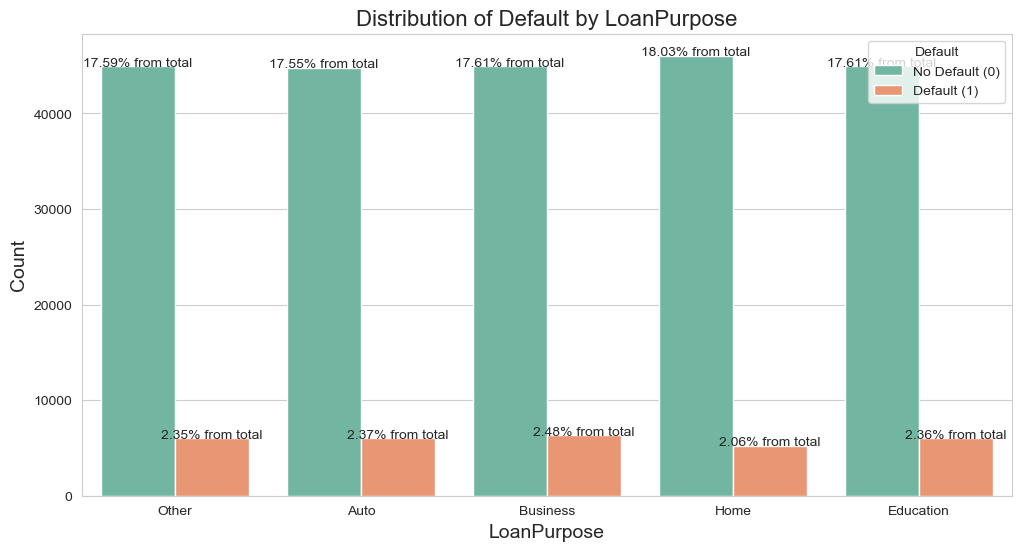

LoanPurpose
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: count, dtype: int64


In [576]:
# distribution between LoanPurpose column and Default coulmn
draw_distribution_catigorical("LoanPurpose")

#### From this distribution, it is clear that this column clearly affects loan repayment, as the percentage of people who obtained a loan for a home is less in default than the rest.

##

### The distribution between HasCoSigner column and Default coulmn

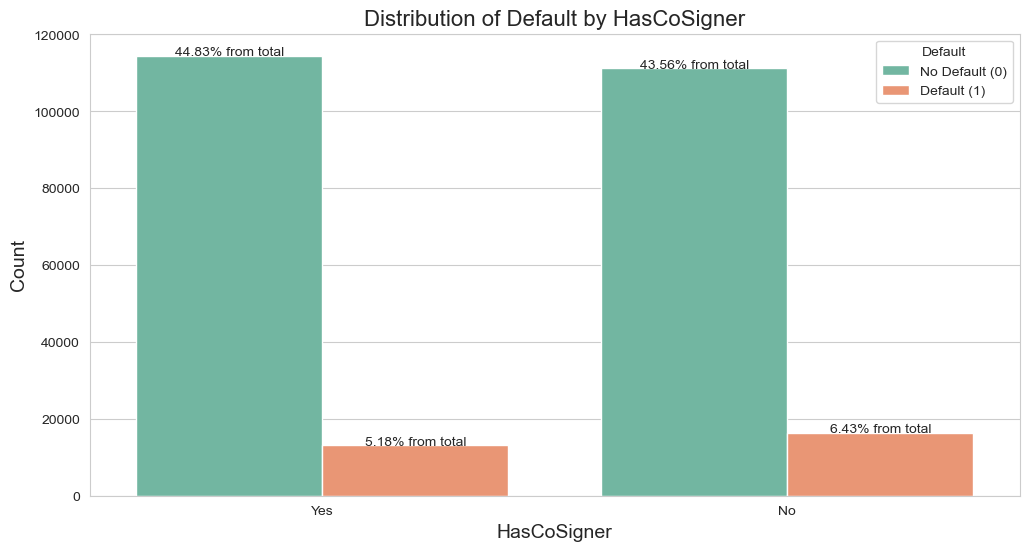

HasCoSigner
Yes    127701
No     127646
Name: count, dtype: int64


In [577]:
# distribution between HasCoSigner column and Default column
draw_distribution_catigorical("HasCoSigner")

#### From this distribution, it is clear that this column clearly affects loan repayment, as the percentage of people who have a co-signer is less in default than those who do not have it.

##

### The distribution between LoanTerm column and Default coulmn

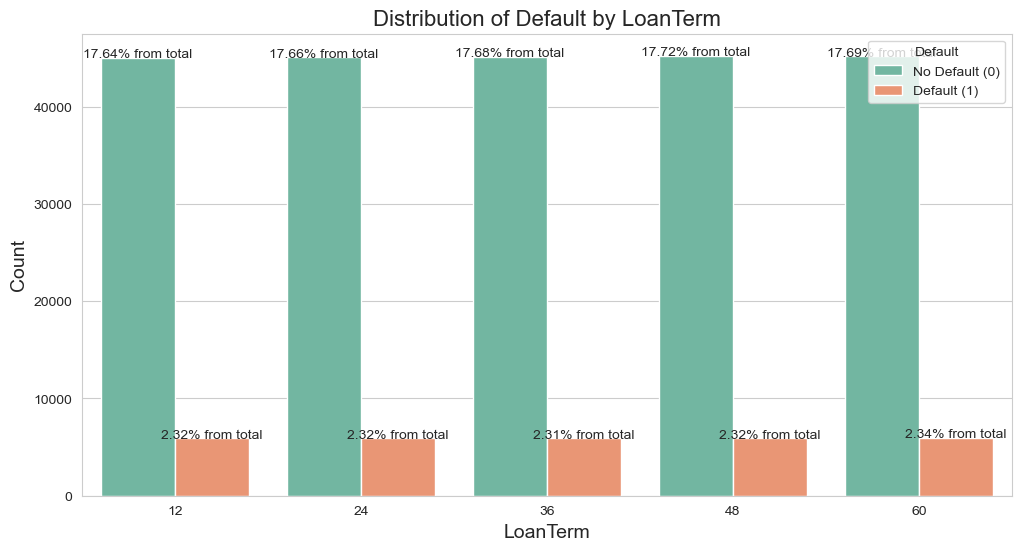

LoanTerm
48    51166
60    51154
36    51061
24    51009
12    50957
Name: count, dtype: int64


In [578]:
# distribution between LoanTerm column and Default coulmn
draw_distribution_catigorical("LoanTerm")


#### From this distribution, it is clear that this column does not affect loan repayment, as the percentage of people who defaulted on repayments over any period is approximately equal.

##

### The distribution between NumCreditLines column and Default coulm

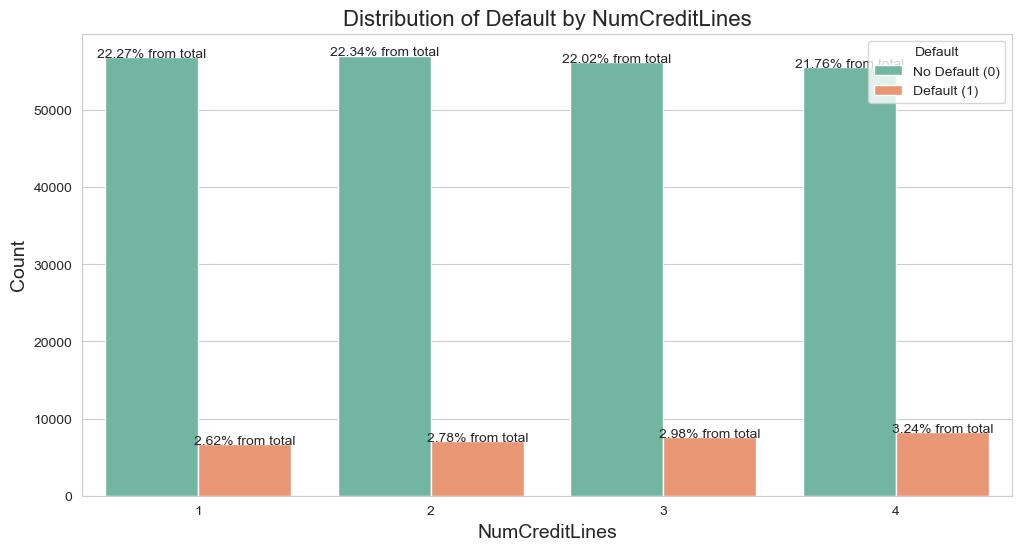

NumCreditLines
2    64130
3    63834
4    63829
1    63554
Name: count, dtype: int64


In [579]:
# distribution between NumCreditLines column and Default coulmn
draw_distribution_catigorical("NumCreditLines")

#### From this distribution, it is clear that this column affects loan repayment, as the percentage of people with a larger number of open lines of credit defaulted on loan repayments.

##

### Conclusion after Visualization and Analysis data


The analysis revealed key factors influencing loan defaults: younger age, lower income, larger loan amounts, shorter employment duration, and higher interest rates significantly increase the likelihood of default. Additionally, characteristics like employment status, education level, marital status, and the presence of a co-signer also play important roles. Variables like loan purpose, number of dependents, and mortgage ownership contribute to repayment reliability. While some features show limited standalone impact, they may enhance predictive power when combined with others.

However, LoanID and LoanTerm were found to have minimal relevance to predicting loan defaults and will be excluded from the machine learning model to improve efficiency and focus on impactful features.

<a id ="Preprocessing"></a>
## Data Preprocessing

In [568]:
# Drop disimportant
new_df = df.drop(columns=['LoanID', 'LoanTerm'])
new_df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,32,51953,189899,511,14,2,11.55,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,56,84820,208294,597,70,3,5.29,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,42,85109,60575,809,40,1,20.90,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [569]:
# List of categorical columns to encode
categorical_columns = ['NumCreditLines', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the categorical columns
encoded_data = encoder.fit_transform(new_df[categorical_columns])

# Create a new DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded DataFrame with the original 1  DataFrame (excluding the encoded columns)
new_df = pd.concat([new_df.drop(categorical_columns, axis=1), encoded_df], axis=1)

# Display the first few rows of the encoded DataFrame
new_df

C:\Users\a1hmm\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,InterestRate,DTIRatio,Default,NumCreditLines_1,NumCreditLines_2,...,HasMortgage_Yes,HasDependents_No,HasDependents_Yes,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_No,HasCoSigner_Yes
0,56,85994,50587,520,80,15.23,0.44,0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,69,50432,124440,458,15,4.81,0.68,0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,46,84208,129188,451,26,21.17,0.31,1,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,32,31713,44799,743,0,7.07,0.23,0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,60,20437,9139,633,8,6.51,0.73,0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,14.11,0.85,0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
255343,32,51953,189899,511,14,11.55,0.21,1,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
255344,56,84820,208294,597,70,5.29,0.50,0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
255345,42,85109,60575,809,40,20.90,0.44,0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [166]:
# Separate features and target
X = new_df.drop(columns=['Default'])
y = new_df['Default']

In [168]:
# Scale numerical features
scaler = StandardScaler()
numerical_columns = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'InterestRate', 'DTIRatio']
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [369]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<a id ="Modeling"></a>
## Modeling and Evaluation

In [416]:
# Define the function to evaluate model
def evaluate_model(y_test, y_pred_probs,threshold=0.04,class_names=None, title='Confusion Matrix'):
    
    y_pred = (y_pred_probs >= threshold).astype(int)
    # Compute evaluation metrics
    cm = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_probs)
    f1 = f1_score(y_test, y_pred)
    
    # Print metrics
    print("Precision: {:.2f}".format(precision))
    print("Recall: {:.2f}".format(recall))
    print("ROC-AUC Score: {:.2f}".format(roc_auc))
    print("F1 Score: {:.2f}".format(f1))
    
    # Define class names if not provided
    if class_names is None:
        class_names = ['Class 0', 'Class 1']
    
    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

In [495]:
# Define the function to calculate net profit
def calculate_net_profit(probs, y_true, threshold, flat_fee=30, loss_min=100, loss_max=1000):
    """
    Calculate net profit based on predictions and true outcomes.
    """
    decisions = probs < threshold  # Approve if probability is below the threshold
    income = decisions.sum() * flat_fee  # Income from approved loans
    
    # Simulate losses from defaults for approved loans
    defaults = (decisions & (y_true == 1))  # Approved and defaulted loans
    losses = np.random.uniform(loss_min, loss_max, size=defaults.sum()).sum()
    
    return income - losses

In [501]:
# Define the function to print optimal profit_and_threshold
def optimal_profit_and_threshold(y_pred):
    # Simulate net profits across different thresholds
    thresholds = np.linspace(0, 1, 50)
    profits = [calculate_net_profit(y_pred, y_test.values, threshold) for threshold in thresholds]

    # Find the optimal threshold for maximum profit
    optimal_threshold = thresholds[np.argmax(profits)]
    max_profit = max(profits)
    
    print("Optimal Threshold : " , optimal_threshold)
    print("Max Profit : " , max_profit)
    
    return optimal_threshold

### Logistic Regression model

In [557]:
logistic_model = LogisticRegression(random_state=42, max_iter=500 , class_weight='balanced')
logistic_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=500, random_state=42)

In [558]:
y_pred_probs_logistic = logistic_model.predict_proba(X_test)[:, 1]

In [565]:
# Optimal Threshold And Max Profit
optimal_threshold = optimal_profit_and_threshold(y_pred_probs_logistic)

Optimal Threshold :  0.26530612244897955
Max Profit :  273482.0197504259


Precision: 0.15
Recall: 0.94
ROC-AUC Score: 0.75
F1 Score: 0.25


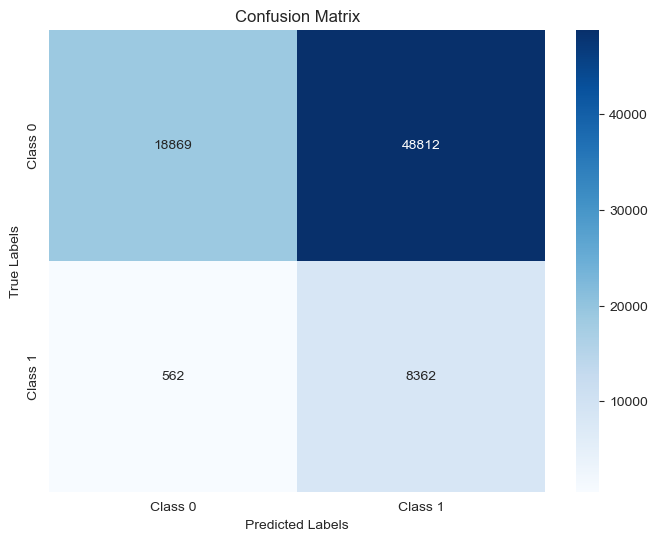

In [566]:
# Evaluate the Random Forest model performance
evaluate_model(y_test, y_pred_probs_logistic,optimal_threshold)

#

# Explanation of the Approach, Machine Learning Algorithm, and Assumptions

## 1. Problem Context and Objective

 The task involves building a loan approval system that predicts the likelihood of a loan applicant defaulting. The goal is to make decisions that maximize the net profit, balancing income from approved loans and losses from defaults. This problem presents a significant challenge due to the class imbalance, where the minority class (defaults) has a much smaller representation than the majority class (non-defaults).

## 2. Data Preprocessing

#### To ensure the model performs well, the following preprocessing steps were undertaken:
 - Feature Scaling: Standardized the numerical features to ensure all features contribute equally to the model's predictions.
 - Addressing Class Imbalance: Applied class_weight='balanced' in the Logistic Regression model to adjust the contribution of each class to the loss function, mitigating the effects of imbalance.

## 3. Machine Learning Algorithm

#### The final model selected was Logistic Regression, with the following considerations:

#### Why Logistic Regression?

- Logistic Regression provides interpretable results in terms of probabilities, which is critical for threshold-based decision-making.
- It performs well when the relationship between features and the target variable is approximately linear.
- With the inclusion of class_weight='balanced', Logistic Regression compensates for the imbalanced dataset by assigning higher weights to the minority class.

#### Hyperparameter Selection:

- random_state=42 ensures reproducibility of results.
- max_iter=500 ensures convergence of the optimization process, especially given the complexity of imbalanced data.
- class_weight='balanced' automatically adjusts weights inversely proportional to class frequencies, improving recall for the minority class.

#### Evaluation Metrics:

- Precision (0.15): Indicates a relatively low proportion of true positives among predicted positives. This is a trade-off for prioritizing recall.
- Recall (0.94): Highlights the model's strong ability to identify defaults, which is critical for this task.
- F1 Score (0.25): Combines precision and recall into a single metric, reflecting the trade-off between the two.
- ROC-AUC (0.75): Demonstrates the model's ability to discriminate between classes.

## 4. Model Performance and Optimization

The high recall (0.92) means the model successfully identifies most loan defaults, minimizing the financial loss associated with undetected defaults. This is achieved by using a balanced weight scheme, which prioritizes the minority class. However, the relatively low precision (0.15) indicates that the model approves some non-defaulting loans as defaults, a reasonable trade-off for this specific application.

Additionally, the model's predictions were threshold-adjusted to improve net profit by maximizing recall while controlling for unnecessary rejections.

## 5. Assumptions

#### Economic Assumptions:

- The flat fee for approved loans (30 OMR) and the variable loss per default (ranging between 100 OMR and 1000 OMR) are accurate representations of the institution's financial model.
- The range of losses (100–1000 OMR) reflects realistic variations in loan amounts, default severity, or associated costs, and it is assumed these values remain consistent over time.

#### Data Assumptions:

- The training data is representative of future loan applicants in terms of feature distributions and default patterns.
- All the provided features are relevant and sufficient to predict loan defaults effectively.
- There are no hidden biases or errors in the data collection process that could impact model predictions.

#### Evaluation Assumptions:

- Metrics like recall are prioritized because failing to identify a default (false negative) incurs higher financial risk than mistakenly rejecting a non-defaulting applicant (false positive).
- The trade-off between income and losses is accurately captured by the cost-benefit structure provided in the task, and the goal is to optimize net profit, not just classification accuracy.

## 6. Conclusion
The Logistic Regression model with class_weight='balanced' was selected due to its ability to handle imbalanced data effectively. It provided the best performance in terms of recall, ensuring most defaults were correctly identified, which aligns with the task's objective to minimize losses while maximizing net profit. While precision and F1 scores were modest, these are acceptable given the primary focus on high recall.

Further optimization could involve fine-tuning thresholds, exploring ensemble methods, or introducing additional features to improve overall performance.






